In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
sheetA = pd.read_csv(r'sheetA.csv')
sheetB = pd.read_csv(r'sheetB.csv')
sheetC = pd.read_csv(r'sheetC.csv')

In [3]:
sheetA.head()

,grill_type,pre_heat_time,fuel_cost_per_meal,market_share,easiness_to_use,life_span_year,initial_investment
0,Charcoal,1200,2.00,0.44,-1,3,91
1,Propane,480,1.55,0.64,2,3,139


In [4]:
sheetB.head()

,item_material,device_id,grill_type,user_satisfaction,fuel_cost
0,Ground Beef Patty,1,Charcoal,-0.9,400.500
1,Ground Beef Patty,3,Charcoal,-1.3,399.600
2,Ground Beef Patty,5,Charcoal,-2.5,389.730
3,Ground Beef Patty,7,Charcoal,-1.7,402.399
4,Hotdog,1,Charcoal,-1.3,372.445


In [5]:
sheetC.head()

,sample_item_index,item_material,is_frozen,grill_type,thumbs_up_score,guess_grill_correct
0,1,Veggie Patty,False,Propane,0.0,True
1,1,Hotdog,False,Propane,0.4,True
2,2,Veggie Patty,True,Propane,0.9,True
3,3,Veggie Patty,False,Propane,0.8,True
4,4,Veggie Patty,True,Propane,0.8,True


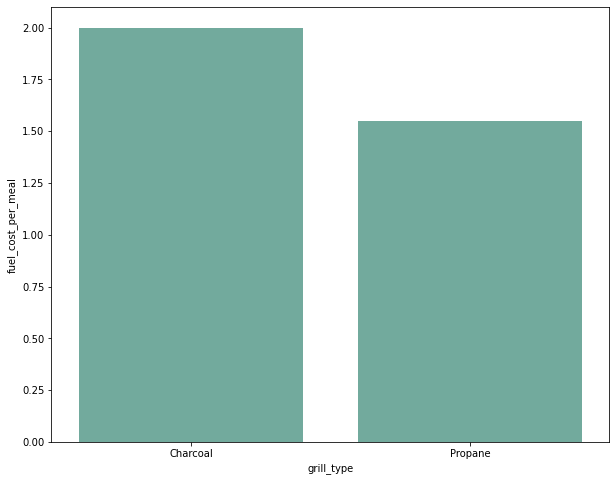

In [6]:
# Which grill type is more fuel efficient based on sheet
plt.figure(figsize=(10, 8))

# plot a bar chart
sns.barplot(
    y="fuel_cost_per_meal", 
    x="grill_type", 
    data=sheetA, 
    estimator=sum, 
    ci=None, 
    color='#69b3a2');

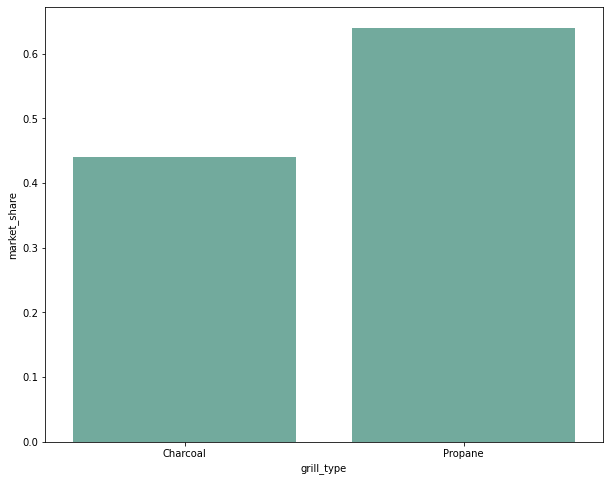

In [7]:
# Which grill type has more market share
plt.figure(figsize=(10, 8))

# plot a bar chart
sns.barplot(
    y="market_share", 
    x="grill_type", 
    data=sheetA, 
    estimator=sum, 
    ci=None, 
    color='#69b3a2');

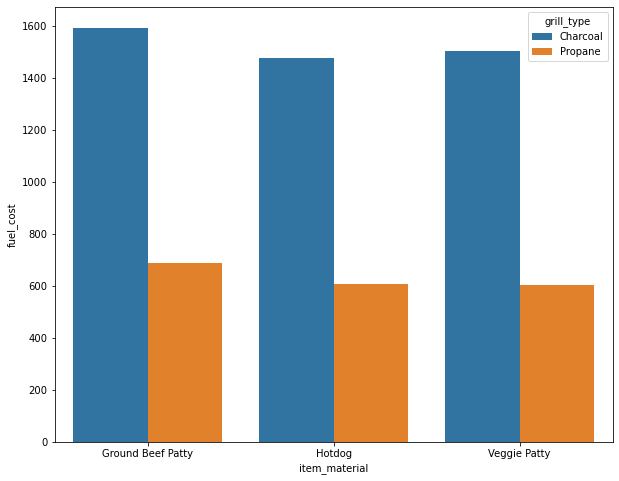

In [8]:
#Considering that the average American grill owner buys a new grill every three years,
#which grill type would cost more based on the fuel cost and initial invest.

fuel_cost_agg = sheetB.groupby(['item_material','grill_type']).fuel_cost.sum().reset_index()
# Set the figure size
plt.figure(figsize=(10, 8))

# grouped barplot
sns.barplot(x="item_material", y="fuel_cost", hue="grill_type", data=fuel_cost_agg, ci=None);

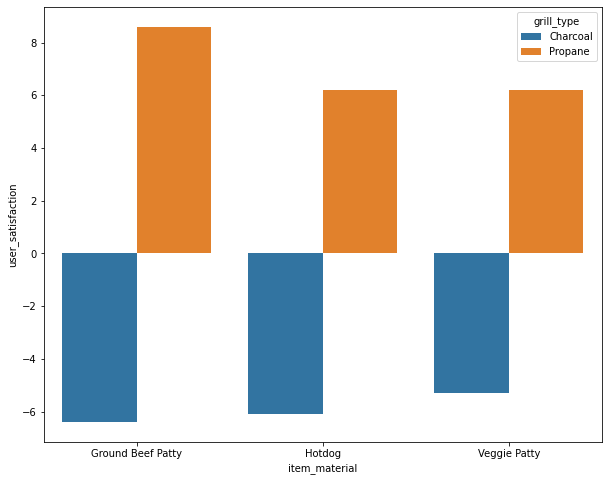

In [9]:
# Which grill type is easier to use based on the user satisfaction score?Based on data, which grill is
# preferred? What factors might play 

user_satisfaction_agg = sheetB.groupby(['item_material','grill_type']).user_satisfaction.sum().reset_index()
# Set the figure size
plt.figure(figsize=(10, 8))

# grouped barplot
sns.barplot(x="item_material", y="user_satisfaction", hue="grill_type", data=user_satisfaction_agg, ci=None);

In [10]:
#(Bonus) Transform SheetC.json to Json
df = pd.read_json (r'SheetC.json')
df.to_csv (r'sheetC_csv.csv', index = None)

In [11]:
# Aggregate data
agg1 = pd.merge(
    sheetB,
    sheetC,
    how="outer",
    on=None,
    left_on=None,
    right_on=None,
    left_index=False,
    right_index=False,
    sort=True,
    suffixes=("_x", "_y"),
    copy=True,
    indicator=False,
    validate=None,
)

In [12]:
agg1.head()

,item_material,device_id,grill_type,user_satisfaction,fuel_cost,sample_item_index,is_frozen,thumbs_up_score,guess_grill_correct
0,Ground Beef Patty,1,Charcoal,-0.9,400.5,8,True,0.0,True
1,Ground Beef Patty,1,Charcoal,-0.9,400.5,9,False,0.0,True
2,Ground Beef Patty,1,Charcoal,-0.9,400.5,10,True,0.5,True
3,Ground Beef Patty,1,Charcoal,-0.9,400.5,11,False,0.3,True
4,Ground Beef Patty,1,Charcoal,-0.9,400.5,12,True,0.2,False


In [13]:
agg_2 = pd.merge(
    agg1,
    sheetA,
    how="outer",
    on=None,
    left_on=None,
    right_on=None,
    left_index=False,
    right_index=False,
    sort=True,
    suffixes=("_x", "_y"),
    copy=True,
    indicator=False,
    validate=None,
)

In [14]:
agg_2.head()

,item_material,device_id,grill_type,user_satisfaction,fuel_cost,sample_item_index,is_frozen,thumbs_up_score,guess_grill_correct,pre_heat_time,fuel_cost_per_meal,market_share,easiness_to_use,life_span_year,initial_investment
0,Ground Beef Patty,1,Charcoal,-0.9,400.5,8,True,0.0,True,1200,2.0,0.44,-1,3,91
1,Ground Beef Patty,1,Charcoal,-0.9,400.5,9,False,0.0,True,1200,2.0,0.44,-1,3,91
2,Ground Beef Patty,1,Charcoal,-0.9,400.5,10,True,0.5,True,1200,2.0,0.44,-1,3,91
3,Ground Beef Patty,1,Charcoal,-0.9,400.5,11,False,0.3,True,1200,2.0,0.44,-1,3,91
4,Ground Beef Patty,1,Charcoal,-0.9,400.5,12,True,0.2,False,1200,2.0,0.44,-1,3,91
